In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Unsupervised Learning - Dimensionality Reduction

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape)

(112, 4)


Principal Component Analysis
============================

PCA is a technique to reduce the dimensionality of the data, by creating a linear projection.
That is, we find new features to represent the data that are a linear combination of the old data (i.e. we rotate it). Thus, we can think of PCA as a projection of our data onto a *new* feature space.

The way PCA finds these new directions is by looking for the directions of maximum variance.
Usually only few components that explain most of the variance in the data are kept. Here, the premise is to reduce the size (dimensionality) of a dataset while capturing most of its information. There are many reason why dimensionality reduction can be useful: It can reduce the computational cost when running learning algorithms, decrease the storage space, and may help with the so-called "curse of dimensionality," which we will discuss in greater detail later.

To illustrate how a rotation might look like, we first show it on two-dimensional data and keep both principal components. Here is an illustration:

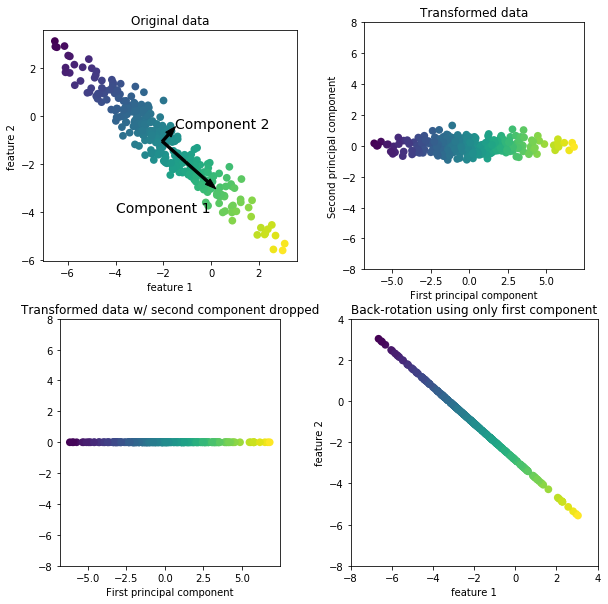

In [3]:
from figures import plot_pca_illustration
plot_pca_illustration()

Now let's go through all the steps in more detail:
We create a Gaussian blob that is rotated:

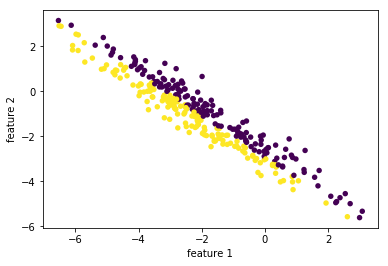

In [4]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2");

As always, we instantiate our PCA model. By default all directions are kept.

In [5]:
from sklearn.decomposition import PCA
pca = PCA()

Then we fit the PCA model with our data. As PCA is an unsupervised algorithm, there is no output ``y``.

In [6]:
pca.fit(X_blob)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Then we can transform the data, projected on the principal components:

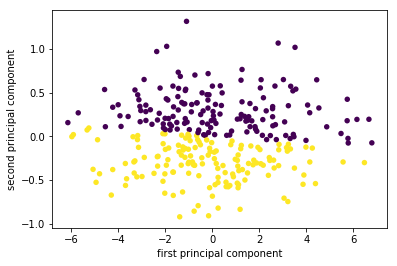

In [7]:
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component");

On the left of the plot you can see the four points that were on the top right before. PCA found fit first component to be along the diagonal, and the second to be perpendicular to it. As PCA finds a rotation, the principal components are always at right angles ("orthogonal") to each other.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
        Visualize the iris dataset using the first two principal components, and compare this visualization to using two of the original features.
      </li>
    </ul>
</div>

In [ ]:
# %load sols/01_iris_pca.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0,
                                                    stratify=iris.target)

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

for X, y in zip((X_train_pca, X_test_pca), (y_train, y_test)):
    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(X[y==i, 0],
                    X[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
